In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from config import FIGURES_DIR, DATA_DIR

# Data Generation

Generate data for bandit and create plot

In [4]:
D = 5 # dimension of the feature vector
K = int(1e4) #4 # number of bandits
P = 5 # power to raise probabilities to. Shifts probabilities towards 0. Requires more exploration.

In [119]:
np.random.seed(0)
global_vector = np.random.normal(0, 1, (1, D))
bandit_vectors = np.random.normal(0, 1, (K, D))

# score: dot product, l2 distance, etc...
scores = np.dot(bandit_vectors, global_vector.T) #np.linalg.norm(bandit_vectors - global_vector, axis=1)

def norm_to_0_1(x):
    return 1 - (x - np.min(x)) / (np.max(x) - np.min(x))

og_probs = norm_to_0_1(scores)
probs = norm_to_0_1(scores)**P

# sort bandits by probability: descending
#bandit_vectors = bandit_vectors[np.argsort(probs)[::-1]]

threshold = 0.8
print(f"Original Descriptive Statistics")
print('mean:', np.mean(og_probs))
print('std:', np.std(og_probs))
print('min:', np.min(og_probs))
print('max:', np.max(og_probs))
og_beyond_threshold = np.sum(og_probs > threshold)
print(f"Number of bandits with probability > {threshold}: {og_beyond_threshold}")

# print descriptive statistics
print(f"\n\nPower {P} Descriptive Statistics")
print('mean:', np.mean(probs))
print('std:', np.std(probs))
print('min:', np.min(probs))
print('max:', np.max(probs))
beyond_threshold = np.sum(probs > threshold)
print(f"Number of bandits with probability > {threshold}: {beyond_threshold}")

bandit_vectors = torch.tensor(bandit_vectors, dtype=torch.float32).squeeze()
probs = torch.tensor(probs, dtype=torch.float32).squeeze()


Original Descriptive Statistics
mean: 0.5063676187903625
std: 0.13601265652453154
min: 0.0
max: 1.0
Number of bandits with probability > 0.8: 167


Power 5 Descriptive Statistics
mean: 0.0600757379501022
std: 0.07983802280339088
min: 0.0
max: 1.0
Number of bandits with probability > 0.8: 7


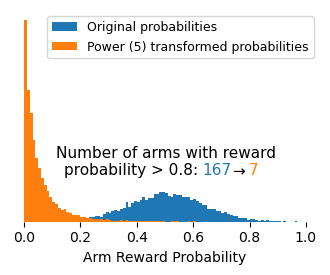

In [117]:
import matplotlib.pyplot as plt

# Set the figure size to width 3 and height 2
plt.figure(figsize=(4, 2.75))

# Plot histograms
og_hist = plt.hist(og_probs, bins=100, density=True, label='Original probabilities')
power_hist = plt.hist(probs, bins=100, density=True, label=f'Power ({P}) transformed probabilities')
# Label the x-axis
plt.xlabel('Arm Reward Probability', fontsize=10)

# Remove y-ticks and y-label
plt.yticks([])
plt.ylabel('')

# Add legend
plt.legend(fontsize=9)

# Get the colors of the first and second histogram
color_of_first_hist = og_hist[2][0].get_facecolor()
color_of_second_hist = power_hist[2][0].get_facecolor()

# Add textboxes to indicate the number of arms with reward probability > threshold
fontsize=11
plt.text(0.15, 0.3, f"Number of arms with reward",  transform=plt.gca().transAxes, fontsize=fontsize)
plt.text(0.175, 0.22, f"probability > {threshold}:", transform=plt.gca().transAxes, fontsize=fontsize)
plt.text(0.62, 0.22, f"{og_beyond_threshold}", transform=plt.gca().transAxes, color=color_of_first_hist, fontsize=fontsize)
plt.text(0.71, 0.22, r"$\rightarrow$", transform=plt.gca().transAxes, color='black', fontsize=fontsize)
plt.text(0.77, 0.22, f"{beyond_threshold}", transform=plt.gca().transAxes, color=color_of_second_hist, fontsize=fontsize)


# remove the plot frame
plt.box(False)

# Show the plot
#plt.savefig(FIGURES_DIR + f'bandit_data_gen.png', bbox_inches='tight', pad_inches=0.005, dpi=200)
plt.show()


In [4]:
bandit_vectors.shape, probs.shape

(torch.Size([10000, 5]), torch.Size([10000]))

In [5]:
bandit_vectors

tensor([[-0.9773,  0.9501, -0.1514, -0.1032,  0.4106],
        [ 0.1440,  1.4543,  0.7610,  0.1217,  0.4439],
        [ 0.3337,  1.4941, -0.2052,  0.3131, -0.8541],
        ...,
        [ 0.1433,  0.6185,  1.3554,  0.7321,  0.7957],
        [ 1.4062, -1.7206, -0.2503,  0.5847, -1.2508],
        [ 0.0660,  1.7000, -1.6192, -0.5964, -2.1175]])

In [6]:
p_ = [f"{p.item():.3f}\n" for p in torch.sort(probs)[0]]
# concat into a single string
p_ = ''.join(p_)
print(p_)

0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.001
0.001
0.00

In [7]:
path = DATA_DIR + f"bandit_D_{D}_K_{K}_P={P}.pt"
torch.save((bandit_vectors, probs), path)